In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import make_pipeline


In [6]:
# Load the datasets
# Load the datasets with skipping bad lines
fake_df = pd.read_csv('/content/Fake.csv', quoting=3, on_bad_lines='skip')  # quoting=3 allows non-quoted strings
real_df = pd.read_csv('/content/True.csv', quoting=3, on_bad_lines='skip')


# Add a 'label' column: 0 for fake, 1 for real
fake_df['label'] = 0
real_df['label'] = 1

# Combine both datasets into one
df = pd.concat([fake_df[['text', 'label']], real_df[['text', 'label']]], ignore_index=True)

# Check the first few rows of the combined dataset
print(df.head())


     text  label
0    News      0
1     NaN      0
2   2017"      0
3     NaN      0
4     NaN      0


In [7]:
# Split the data into features (X) and labels (y)
X = df['text']  # Features: News text
y = df['label']  # Labels: 0 for fake, 1 for real

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [9]:
# Handle missing values in the dataset
df['text'] = df['text'].fillna("No content available")

# Split the data into features (X) and labels (y)
X = df['text']  # Features: News text
y = df['label']  # Labels: 0 for fake, 1 for real

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a pipeline that combines the vectorizer and classifier
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

# Train the model using the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Display a detailed classification report
print(classification_report(y_test, y_pred))


Accuracy: 50.96%
              precision    recall  f1-score   support

           0       0.51      1.00      0.67      6415
           1       0.72      0.00      0.01      6209

    accuracy                           0.51     12624
   macro avg       0.62      0.50      0.34     12624
weighted avg       0.62      0.51      0.35     12624



SAVING MODEL

In [11]:
import joblib

# Save the model
joblib.dump(model, 'fake_news_model.pkl')


['fake_news_model.pkl']

BASIC CHECK

In [12]:

# Check basic information
print(df.info())

# Check for missing values
print(df.isnull().sum())

# Basic statistical summary
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42078 entries, 0 to 42077
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    42078 non-null  object
 1   label   42078 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 657.6+ KB
None
text     0
label    0
dtype: int64
              label
count  42078.000000
mean       0.493227
std        0.499960
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000


FAKE AND REAL NEWS DISTRIBUTION

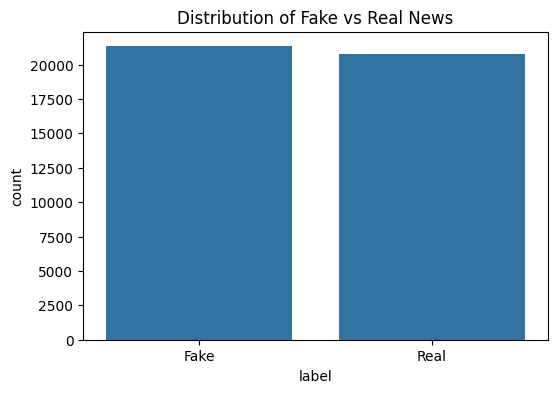

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of labels (fake vs. real)
plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=df)
plt.title('Distribution of Fake vs Real News')
plt.xticks(ticks=[0, 1], labels=['Fake', 'Real'])
plt.show()



DISTRIBUTION OF LENGTH OF FAKE AND REAL NEWS

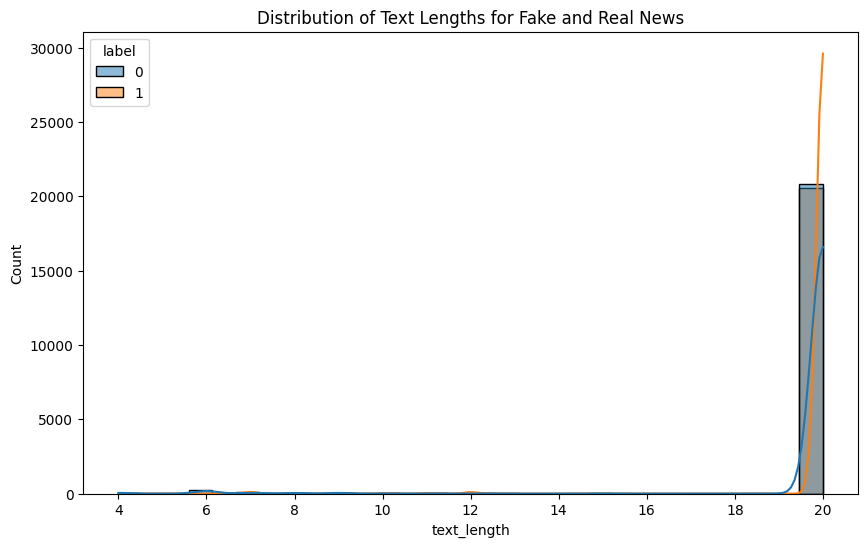

In [18]:
# Add a column for the length of each news article
df['text_length'] = df['text'].apply(lambda x: len(str(x)))

# Visualize the distribution of text lengths for fake and real news
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='text_length', hue='label', kde=True, bins=30)
plt.title('Distribution of Text Lengths for Fake and Real News')
plt.show()


WORDCLOUD FOR NEWS

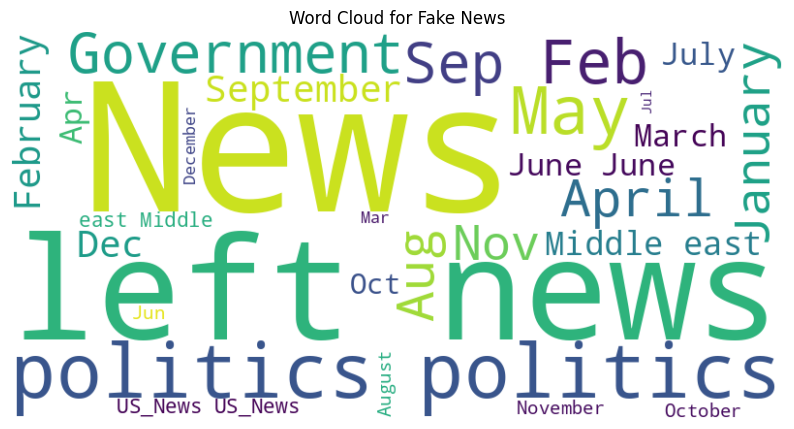

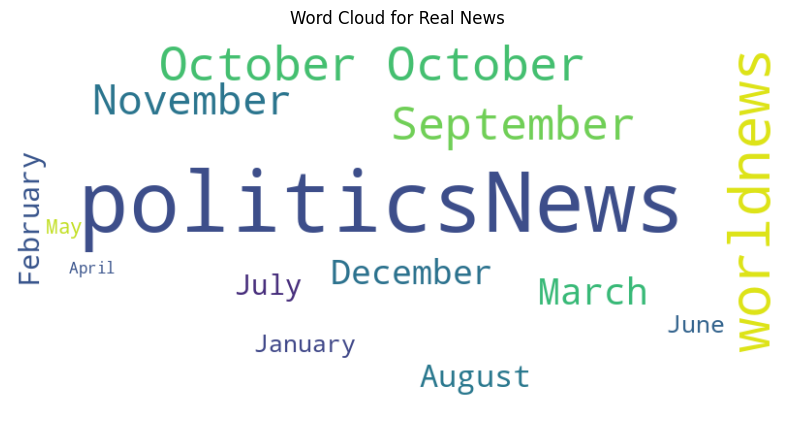

In [20]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Word cloud for fake news
fake_text = " ".join(fake_df['text'].dropna())
fake_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(fake_text)

plt.figure(figsize=(10, 6))
plt.imshow(fake_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Fake News')
plt.axis('off')
plt.show()

# Word cloud for real news
real_text = " ".join(real_df['text'].dropna())
real_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(real_text)

plt.figure(figsize=(10, 6))
plt.imshow(real_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Real News')
plt.axis('off')
plt.show()



CANDLE GRAPH OF MOST FREQUENT WORDS IN FAKE NEWS

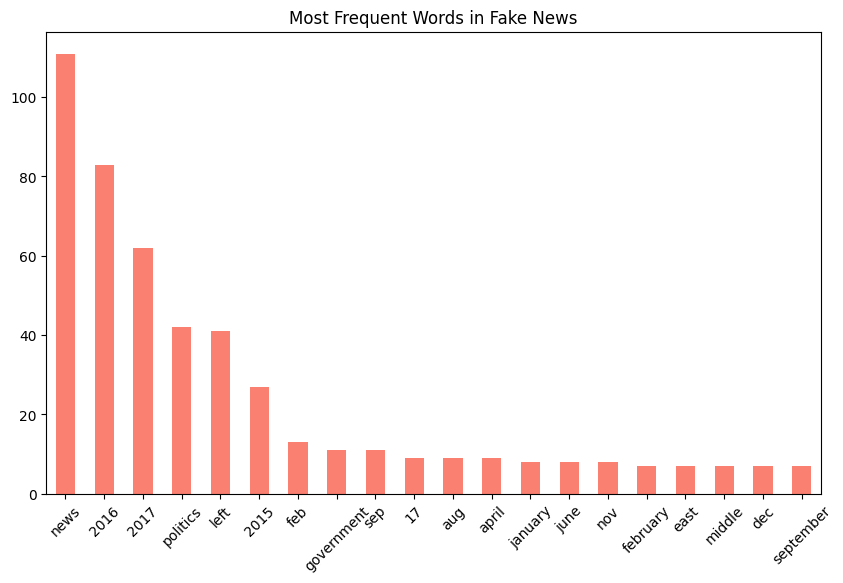

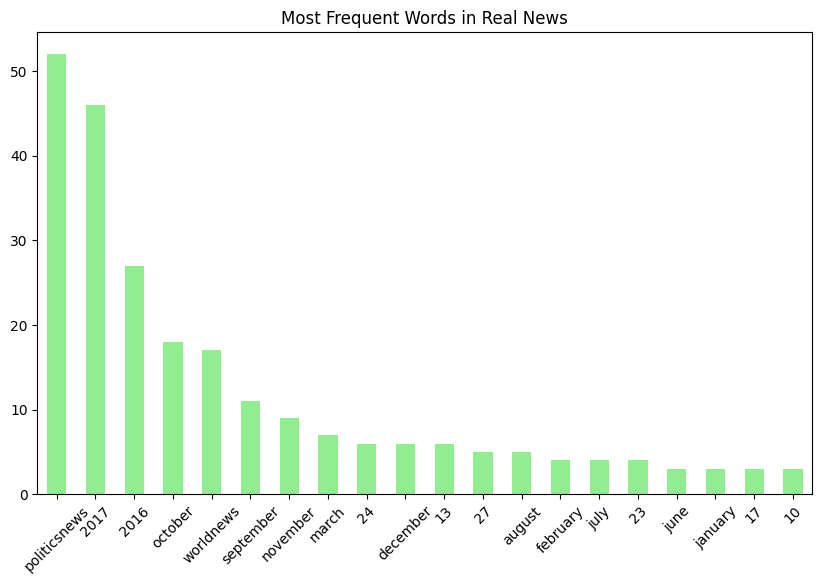

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

# Create a CountVectorizer to extract the most common words
vectorizer = CountVectorizer(stop_words='english', max_features=20)

# Fit on the fake news data
fake_words = vectorizer.fit_transform(fake_df['text'].dropna())
fake_word_freq = pd.DataFrame(fake_words.toarray(), columns=vectorizer.get_feature_names_out())
fake_word_freq = fake_word_freq.sum().sort_values(ascending=False)

# Plot the most common words in fake news
plt.figure(figsize=(10, 6))
fake_word_freq.head(20).plot(kind='bar', color='salmon')
plt.title('Most Frequent Words in Fake News')
plt.xticks(rotation=45)
plt.show()

# Fit on the real news data
real_words = vectorizer.fit_transform(real_df['text'].dropna())
real_word_freq = pd.DataFrame(real_words.toarray(), columns=vectorizer.get_feature_names_out())
real_word_freq = real_word_freq.sum().sort_values(ascending=False)

# Plot the most common words in real news
plt.figure(figsize=(10, 6))
real_word_freq.head(20).plot(kind='bar', color='lightgreen')
plt.title('Most Frequent Words in Real News')
plt.xticks(rotation=45)
plt.show()


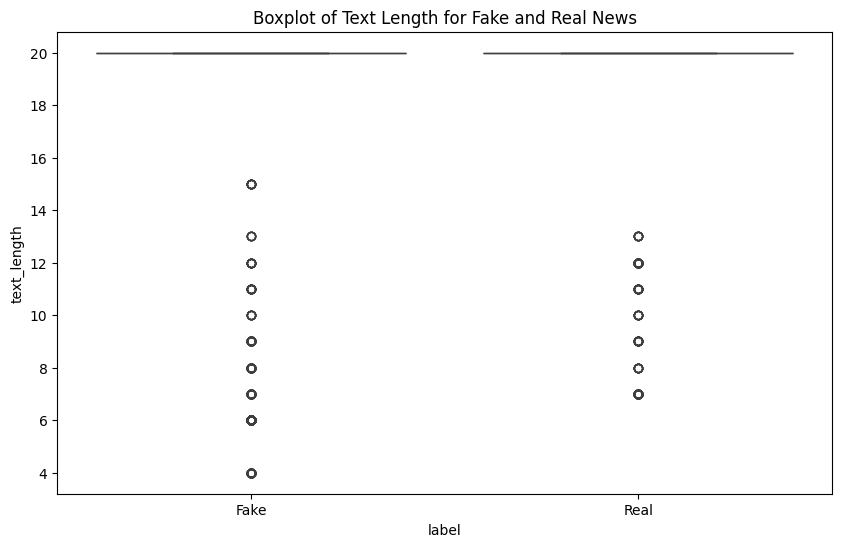

In [22]:
# Visualize the correlation between text length and label
plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='text_length', data=df)
plt.title('Boxplot of Text Length for Fake and Real News')
plt.xticks(ticks=[0, 1], labels=['Fake', 'Real'])
plt.show()


In [23]:
# Check for duplicate articles
duplicate_news = df[df.duplicated(subset='text')]
print(f"Number of duplicate news articles: {len(duplicate_news)}")

# If you want to remove duplicates, you can do:
df = df.drop_duplicates(subset='text')


Number of duplicate news articles: 41908


SUMMARY CHARTS

<class 'pandas.core.frame.DataFrame'>
Index: 170 entries, 0 to 41975
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   text         170 non-null    object
 1   label        170 non-null    int64 
 2   text_length  170 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 5.3+ KB
None
Number of unique articles: 170


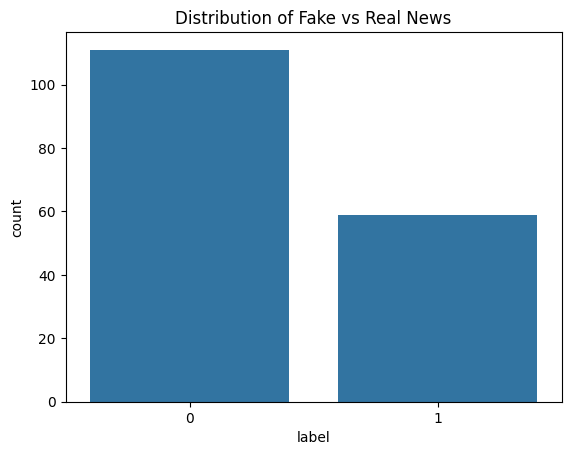

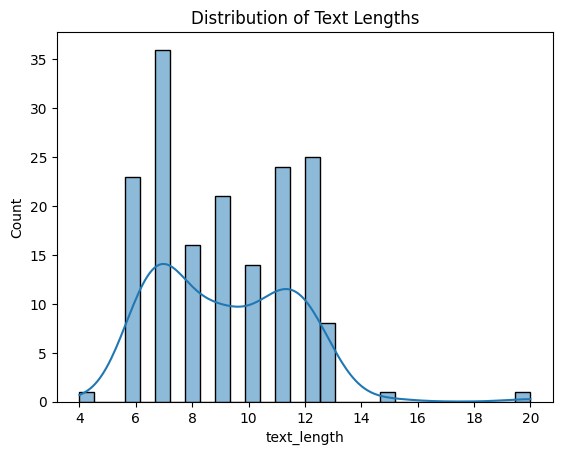

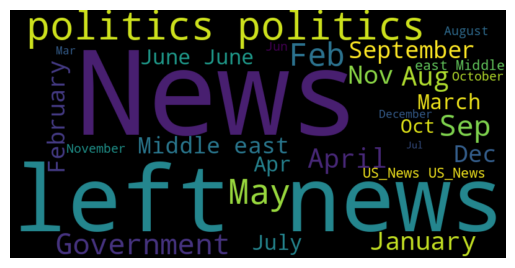

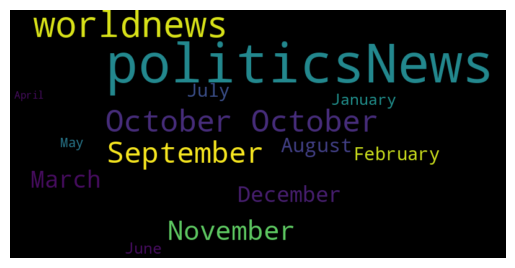

In [24]:
# Basic information about the dataset
print(df.info())

# Number of unique texts
print(f"Number of unique articles: {df['text'].nunique()}")

# Distribution of the label
sns.countplot(x='label', data=df)
plt.title('Distribution of Fake vs Real News')
plt.show()

# Distribution of text lengths
sns.histplot(df['text_length'], kde=True, bins=30)
plt.title('Distribution of Text Lengths')
plt.show()

# Word Cloud for Fake News
fake_text = " ".join(fake_df['text'].dropna())
fake_wordcloud = WordCloud(width=800, height=400).generate(fake_text)
plt.imshow(fake_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Word Cloud for Real News
real_text = " ".join(real_df['text'].dropna())
real_wordcloud = WordCloud(width=800, height=400).generate(real_text)
plt.imshow(real_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Most frequent words for Fake and Real news
# (Use the code from the 'Most Frequent Words' section)


ACCURACY PRECISSION AND RECALL OF MODEL


In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# List of models to evaluate
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='linear', probability=True),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Naive Bayes": MultinomialNB()
}

# TF-IDF Vectorizer for feature extraction
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Function to train, predict, and evaluate models
def train_and_evaluate_model(model_name, model, X_train, X_test, y_train, y_test):
    print(f"Training and evaluating model: {model_name}")
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Predict on test data

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Print metrics
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print(f"Precision: {precision * 100:.2f}%")
    print(f"Recall: {recall * 100:.2f}%")
    print(f"F1-Score: {f1 * 100:.2f}%")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("-" * 50)

# Loop through each model and evaluate
for model_name, model in models.items():
    train_and_evaluate_model(model_name, model, X_train_tfidf, X_test_tfidf, y_train, y_test)


Training and evaluating model: Random Forest
Accuracy: 50.93%
Precision: 66.67%
Recall: 0.45%
F1-Score: 0.90%

Classification Report:
              precision    recall  f1-score   support

           0       0.51      1.00      0.67      6415
           1       0.67      0.00      0.01      6209

    accuracy                           0.51     12624
   macro avg       0.59      0.50      0.34     12624
weighted avg       0.59      0.51      0.35     12624

--------------------------------------------------
Training and evaluating model: SVM
Accuracy: 50.96%
Precision: 72.50%
Recall: 0.47%
F1-Score: 0.93%

Classification Report:
              precision    recall  f1-score   support

           0       0.51      1.00      0.67      6415
           1       0.72      0.00      0.01      6209

    accuracy                           0.51     12624
   macro avg       0.62      0.50      0.34     12624
weighted avg       0.62      0.51      0.35     12624

-------------------------------------